WEEK-2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/simhadrikondapally/Downloads/Exam_Score_Prediction.csv")

In [3]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19800.01,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19800.01,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19800.01,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19800.01,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  float64
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 2.0+ MB


In [5]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.500000,20.473300,4.007604,70.017365,7.00856,62.513225
std,5770.211372,2.284458,2.308313,17.282262,1.73209,18.908491
min,200.990000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,19800.010000,24.000000,7.910000,99.400000,9.90000,100.000000


In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


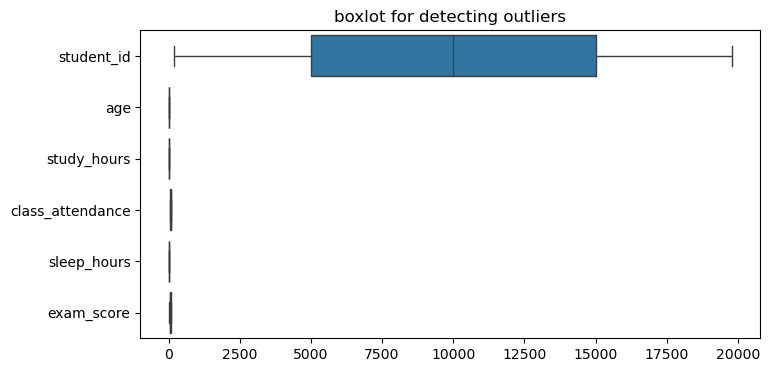

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, orient="h")
plt.title("boxlot for detecting outliers")
plt.show()

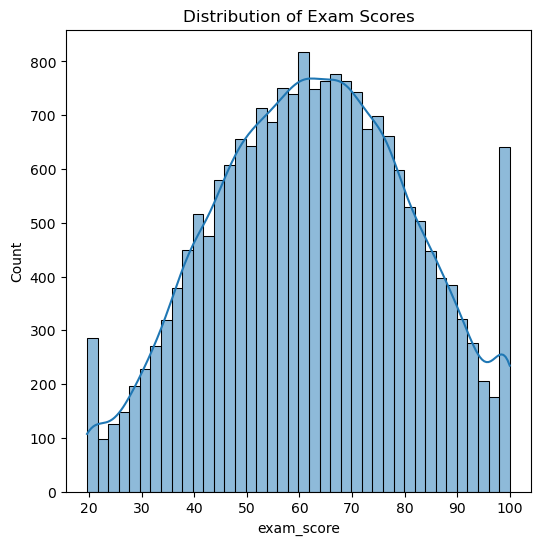

In [11]:
plt.figure(figsize=(6,6))
sns.histplot(df["exam_score"], kde=True)
plt.title("Distribution of Exam Scores")
plt.show()

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
Categorical: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [13]:
df['gender'] = df['gender'].replace({'male': 0, 'female': 1,'other': 2}).astype(int)

/var/folders/zr/z5frqmsx5s78zl978389ty9w0000gn/T/ipykernel_3788/3832553730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'male': 0, 'female': 1,'other': 2}).astype(int)


In [14]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,0,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,2,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,0,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,2,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,1,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19800.01,18,2,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19800.01,18,0,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19800.01,19,2,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19800.01,19,0,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [15]:
print(df.columns)

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')


In [16]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,0,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,2,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,0,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,2,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,1,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19800.01,18,2,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19800.01,18,0,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19800.01,19,2,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19800.01,19,0,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


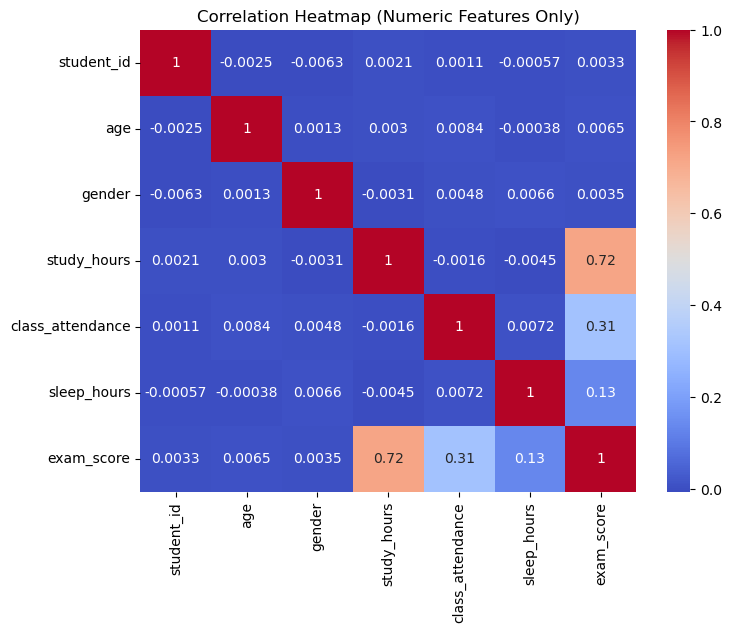

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

                  student_id       age    gender  study_hours  \
student_id          1.000000 -0.002545 -0.006258     0.002129   
age                -0.002545  1.000000  0.001345     0.002955   
gender             -0.006258  0.001345  1.000000    -0.003061   
study_hours         0.002129  0.002955 -0.003061     1.000000   
class_attendance    0.001104  0.008449  0.004831    -0.001645   
sleep_hours        -0.000575 -0.000385  0.006612    -0.004533   
exam_score          0.003267  0.006522  0.003539     0.717788   

                  class_attendance  sleep_hours  exam_score  
student_id                0.001104    -0.000575    0.003267  
age                       0.008449    -0.000385    0.006522  
gender                    0.004831     0.006612    0.003539  
study_hours              -0.001645    -0.004533    0.717788  
class_attendance          1.000000     0.007187    0.308850  
sleep_hours               0.007187     1.000000    0.133222  
exam_score                0.308850     0.1332

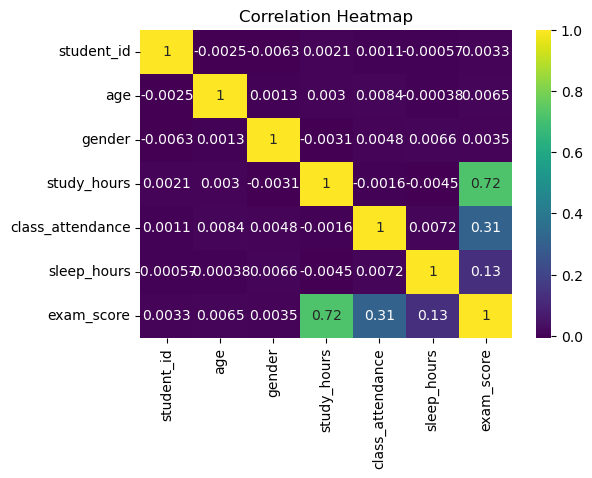

In [18]:
plt.figure(figsize=(6,4))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[num_cols]
y = df['exam_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[num_cols])
X_test_scaled_num  = scaler.transform(X_test[num_cols])

# put them back into original dataframes
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = X_train_scaled_num
X_test_scaled[num_cols]  = X_test_scaled_num

In [20]:
df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,0,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,2,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,0,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,2,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,1,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19800.01,18,2,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19800.01,18,0,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19800.01,19,2,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,19800.01,19,0,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Create model
model = LinearRegression()

#Train model on scaled training data
model.fit(X_train_scaled, y_train)

#Predict on test data
y_pred = model.predict(X_test_scaled)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MSE  :", mse)
print("RMSE :", rmse)
print("R² Score:", r2)

Model Evaluation:
MSE  : 8.577442394649106e-29
RMSE : 9.261448263986095e-15
R² Score: 1.0


In [22]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance

,Feature,Coefficient
5,exam_score,1.890668e+01
2,study_hours,-7.771561e-15
1,age,6.661338e-15
3,class_attendance,-1.332268e-15
4,sleep_hours,-1.110223e-15
0,student_id,-2.457131e-16


In [23]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(r2_score(y_test, y_pred))

-4211.034129668045


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.34482759, 0.88945578, 0.56896552,
        0.48881233],
       [0.        , 0.85714286, 0.4201788 , 0.41156463, 0.0862069 ,
        0.43781794],
       [0.        , 0.71428571, 0.99616858, 0.61564626, 0.75862069,
        0.87935473],
       ...,
       [1.        , 0.28571429, 0.99616858, 0.46938776, 0.0862069 ,
        0.5584632 ],
       [1.        , 0.28571429, 0.57726692, 0.60714286, 0.34482759,
        0.73880922],
       [1.        , 0.42857143, 0.94763729, 0.12414966, 0.5862069 ,
        0.63930797]], shape=(20000, 6))

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)